In [5]:
# Importing necessary libraries
import numpy as np  # Used for numerical operations (e.g., arrays, mathematical functions)
import pandas as pd  # Used for data manipulation and analysis (e.g., dataframes)
import matplotlib.pyplot as plt  # Used for plotting and visualizing data
import seaborn as sns  # Statistical data visualization, builds on top of matplotlib
import plotly.express as px # for creating interactive visualizations.
from sklearn.preprocessing import LabelEncoder #  for encoding categorical features into numeric values.
import imblearn
from imblearn.over_sampling import SMOTE


In [6]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [7]:
# Import the dataset from a CSV file and store it in a pandas DataFrame
data = pd.read_csv("first inten project.csv")
# Display the data, which prints the first few rows of the DataFrame to the console
data

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,INN36282,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115.00,1,9/13/2018,Canceled
36281,INN36283,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
36282,INN36284,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
36283,INN36285,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled


In [8]:
#It will show the number of rows and columns in the DataFrame as a tuple, like (rows, columns).
data.shape

(36285, 17)

Dataset has 36,285 rows and 17 columns

# Data Cleaning and EDA

In [4]:
#checking for null values
data.isnull().sum()

,0
Booking_ID,0
number of adults,0
number of children,0
number of weekend nights,0
number of week nights,0
type of meal,0
car parking space,0
room type,0
lead time,0
market segment type,0


there are no null values

In [5]:
# Check for duplicate rows
data.duplicated().sum()

0

No duplicate rows

In [9]:
# Strip any leading/trailing spaces from column names
data.columns = data.columns.str.strip()

In [10]:
# drop Booking_ID Column
data=data.drop(columns=['Booking_ID'])

In [10]:
#To get a summary of the numerical data in your dataframe,
#you can use the .describe() method in pandas. This will provide you with statistical measures such as
#mean, standard deviation, minimum, and maximum values for each numerical column.
data.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [9]:
#The data.info() method in pandas provides a concise summary of the DataFrame, including the number of
#non-null entries, data types, and memory usage.
#It's useful for checking the structure and completeness of your data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23475 entries, 0 to 23474
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   number of adults          23475 non-null  int64  
 1   number of children        23475 non-null  int64  
 2   number of weekend nights  23475 non-null  int64  
 3   number of week nights     23475 non-null  int64  
 4   type of meal              23475 non-null  object 
 5   car parking space         23475 non-null  int64  
 6   room type                 23475 non-null  object 
 7   lead time                 23475 non-null  int64  
 8   market segment type       23475 non-null  object 
 9   repeated                  23474 non-null  float64
 10  P-C                       23474 non-null  float64
 11  P-not-C                   23474 non-null  float64
 12  average price             23474 non-null  float64
 13  special requests          23474 non-null  float64
 14  date o

In [ ]:
#we notice that date of reservation is of type object so we change it to datetime

In [11]:
# Convert 'date of reservation' column to datetime
data['date of reservation'] = pd.to_datetime(data['date of reservation'], format='%m/%d/%Y', errors='coerce')

invalid_dates = data[data['date of reservation'].isna()]

print("Rows with invalid dates:\n", invalid_dates)

data = data.dropna(subset=['date of reservation'])

# Verify the change
data.info()

Rows with invalid dates:
        number of adults  number of children  number of weekend nights  \
2626                  2                   0                         1   
3677                  1                   0                         1   
5600                  2                   0                         1   
6343                  1                   0                         1   
7648                  2                   1                         1   
8000                  2                   2                         1   
8989                  1                   0                         1   
9153                  2                   2                         1   
9245                  2                   0                         1   
9664                  1                   0                         1   
9934                  1                   0                         1   
10593                 2                   0                         1   
10652                 2  

# handling outliers

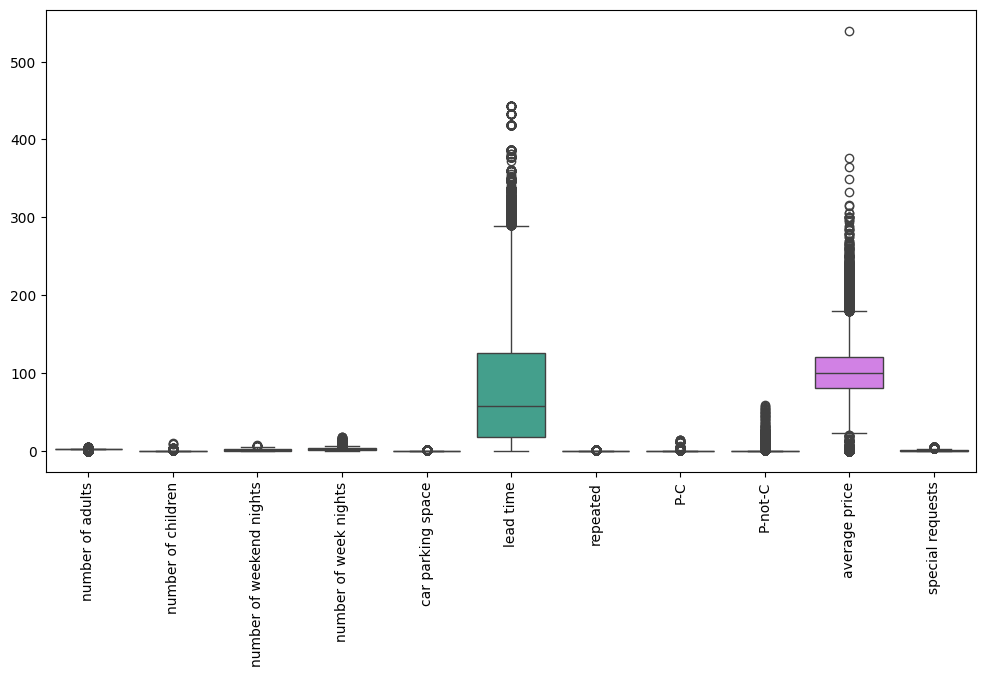

In [12]:


# Define numerical columns
numerical_columns = ['number of adults', 'number of children', 'number of weekend nights',
                     'number of week nights', 'car parking space', 'lead time', 'repeated',
                     'P-C', 'P-not-C', 'average price', 'special requests']

# Set figure size
plt.figure(figsize=(12, 6))

# Create box plot for the specified numerical columns
sns.boxplot(data=data[numerical_columns])

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


we see that average price has outliers and lead time has alot of variability as when as its min is zero and max is 443 from the
describe function

In [ ]:
# to see outliers clearly
fig = px.box(data, y='average price')
fig.show()

In [13]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['average price'].quantile(0.25)
Q3 = data['average price'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print the bounds
print('Lower Bound:', lower_bound)
print('Upper Bound:', upper_bound)

# Identify outliers
outliers = data.loc[(data['average price'] < lower_bound) | (data['average price'] > upper_bound)]
print('Number of outliers:', len(outliers))


Lower Bound: 20.749999999999993
Upper Bound: 179.55
Number of outliers: 1692


In [14]:
# Trim the outliers by keeping only the data within the bounds
new_data = data.loc[(data['average price'] >= lower_bound) & (data['average price'] <= upper_bound)]

# Print the results
print('Before removing outliers:', len(data))
print('After removing outliers:', len(new_data))
print('Outliers removed:', len(data) - len(new_data))


Before removing outliers: 36248
After removing outliers: 34556
Outliers removed: 1692


In [ ]:
# After removing outliers
fig = px.box(new_data, y='average price')
fig.show()

In [ ]:
# to see outliers clearly
fig = px.box(new_data, y='lead time')
fig.show()

In [15]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = new_data['lead time'].quantile(0.25)
Q3 = new_data['lead time'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print the bounds
print('Lower Bound:', lower_bound)
print('Upper Bound:', upper_bound)

# Identify outliers
outliers = new_data.loc[(new_data['lead time'] < lower_bound) | (data['lead time'] > upper_bound)]
print('Number of outliers:', len(outliers))


Lower Bound: -150.0
Upper Bound: 298.0
Number of outliers: 1118


In [16]:
# Trim the outliers by keeping only the data within the bounds
new_df = new_data.loc[(new_data['lead time'] >= lower_bound) & (new_data['lead time'] <= upper_bound)]

# Print the results
print('Before removing outliers:', len(new_data))
print('After removing outliers:', len(new_df))
print('Outliers removed:', len(new_data) - len(new_df))


Before removing outliers: 34556
After removing outliers: 33438
Outliers removed: 1118


In [ ]:
# After removing outliers
fig = px.box(new_df, y='lead time')
fig.show()

# Exploring Numerical columns

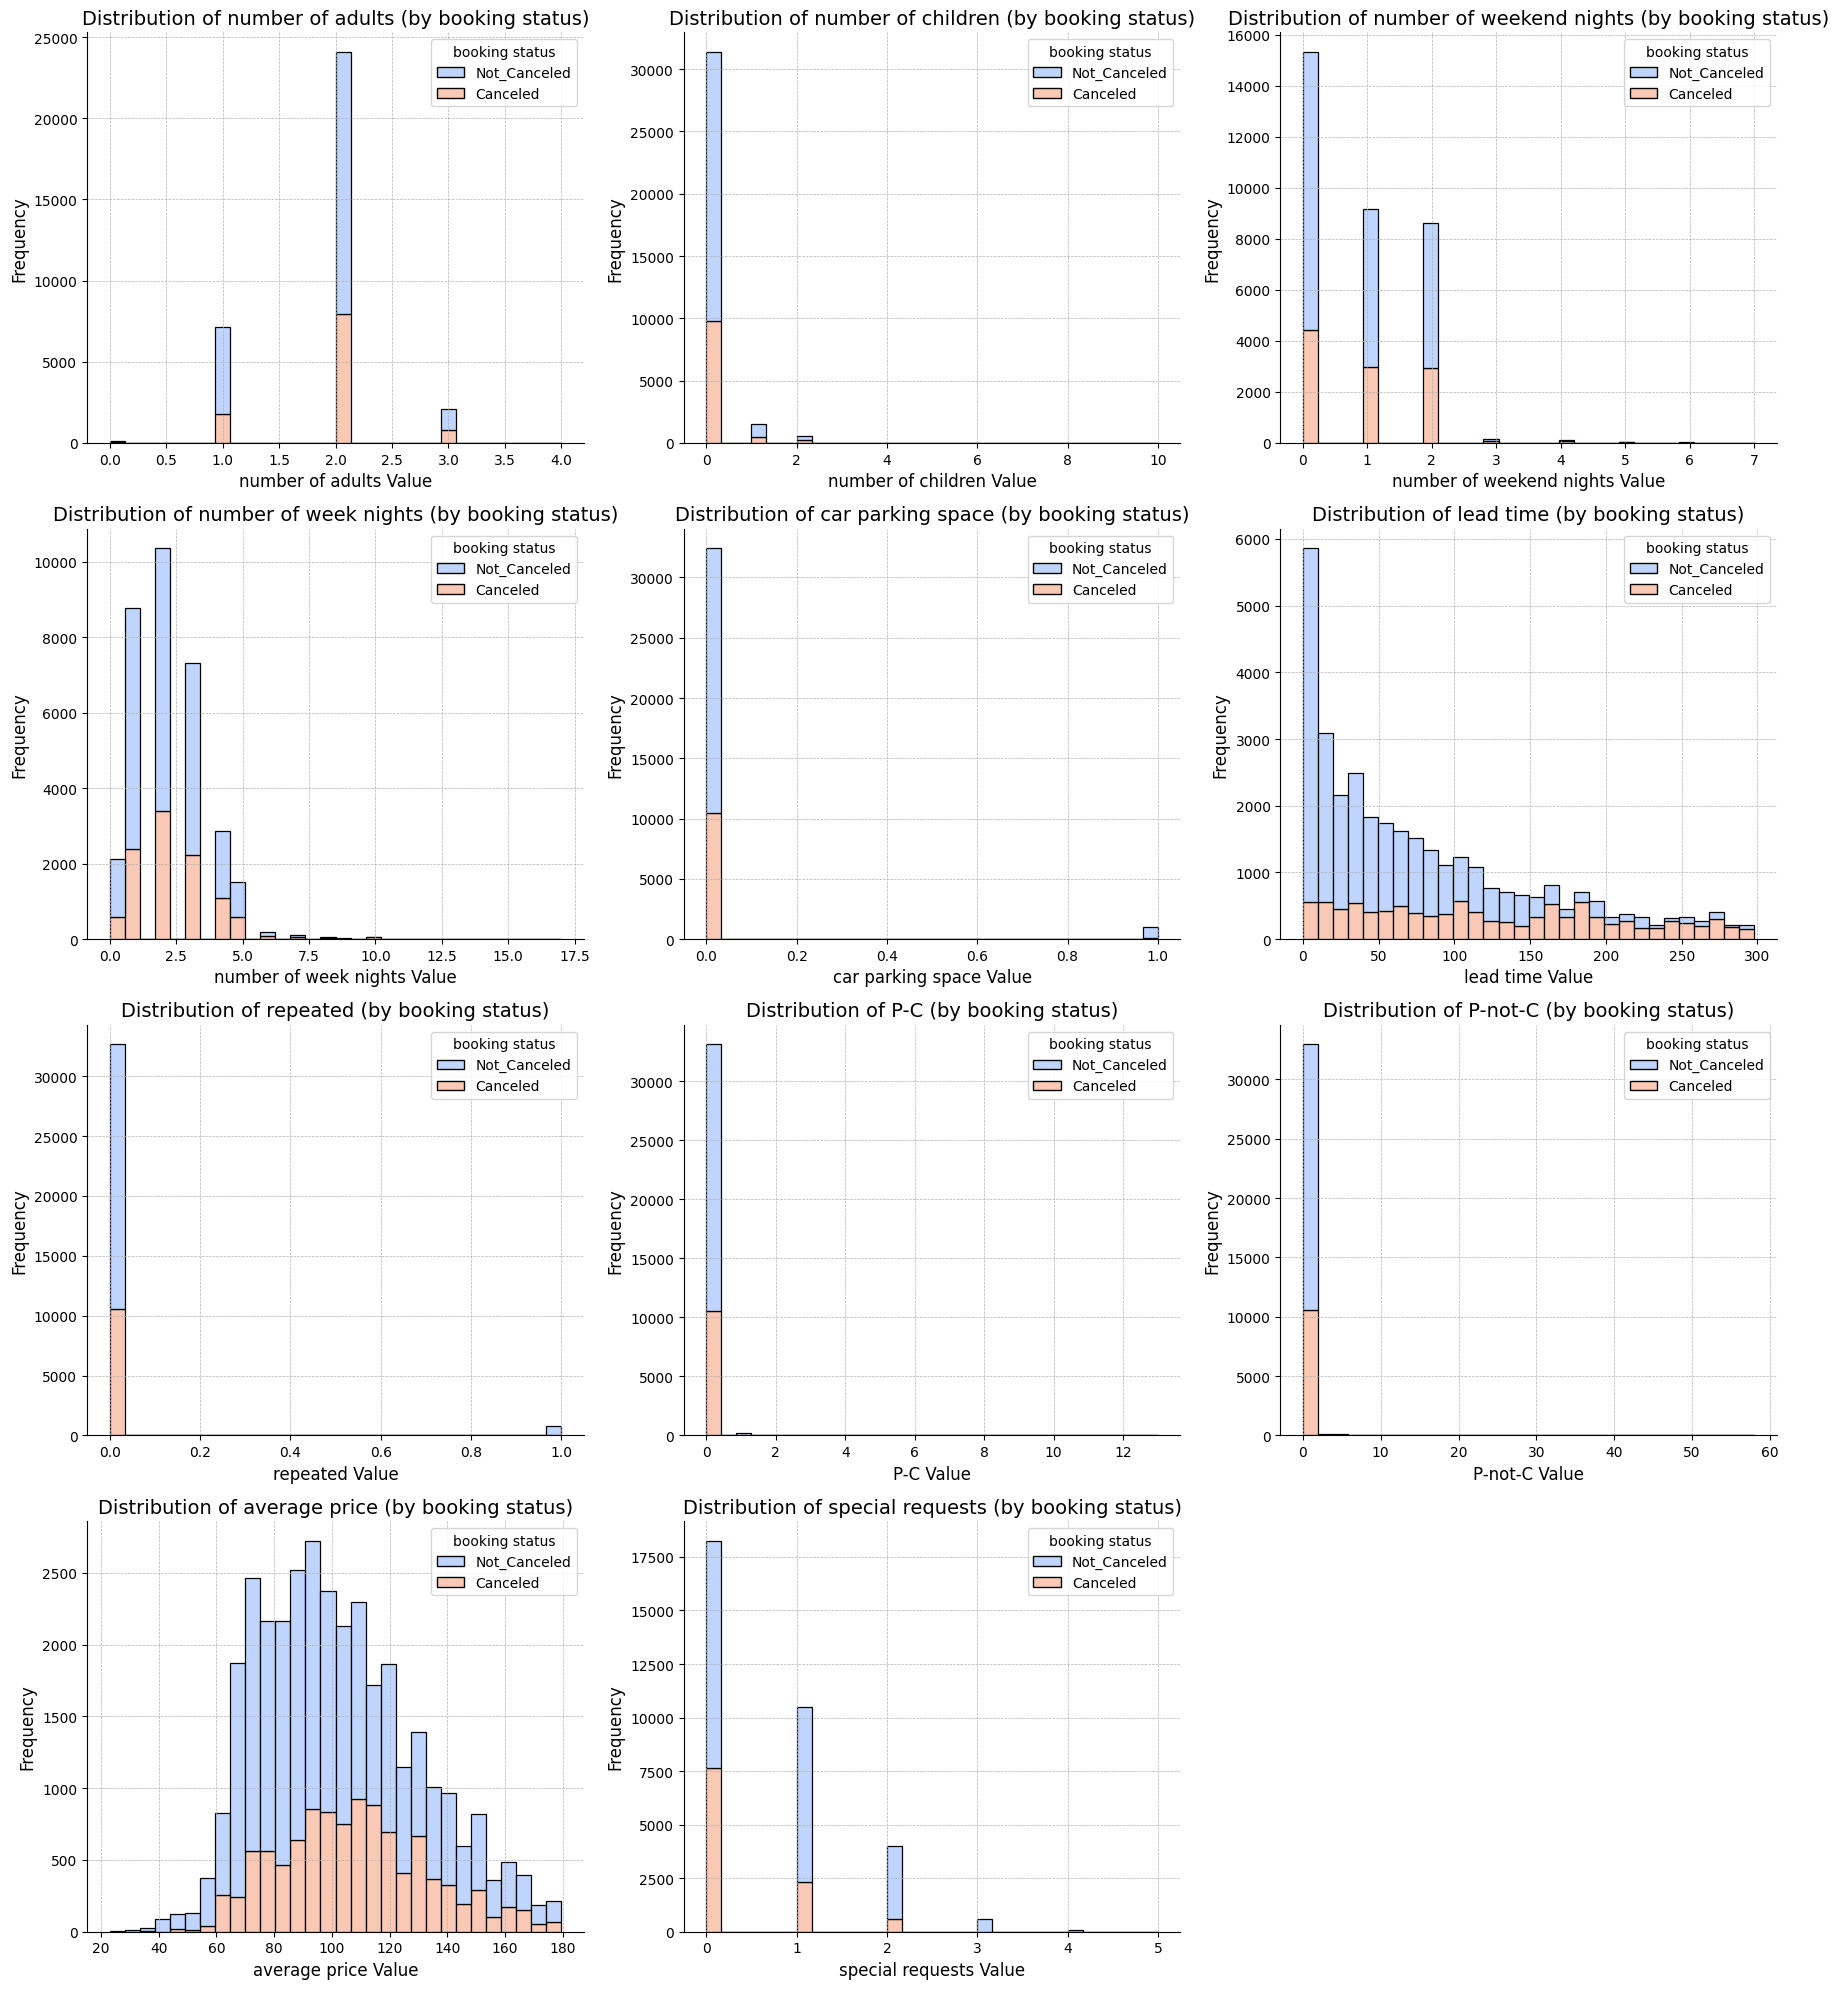

In [18]:
# Define the list of numerical columns to visualize
numerical_columns = ['number of adults', 'number of children', 'number of weekend nights',
                     'number of week nights', 'car parking space', 'lead time', 'repeated',
                     'P-C', 'P-not-C', 'average price', 'special requests']

# Get the number of numerical features
L = len(numerical_columns)

# Define number of columns and rows for the subplots
ncol = 3  # Number of columns in the grid
nrow = int(np.ceil(L / ncol))  # Number of rows, using ceiling to round up

# Create a figure with subplots
fig, axes = plt.subplots(nrow, ncol, figsize=(18, 5 * nrow))  # Adjust figure size
fig.subplots_adjust(top=0.92)  # Adjust space at the top

# Flatten the axes array for easier iteration over each plot
axes = axes.flatten()

# Loop through each numerical column and create a histogram
for i, col in enumerate(numerical_columns):
    sns.histplot(data=new_df, x=col, hue="booking status",  # Target feature for color distinction
                 multiple="stack", ax=axes[i], bins=30, palette="coolwarm")  # Stack histograms for better comparison
    axes[i].set_title(f'Distribution of {col} (by booking status)', fontsize=14)  # Title showing the column name
    axes[i].set_xlabel(f'{col} Value', fontsize=12)  # X-axis label
    axes[i].set_ylabel('Frequency', fontsize=12)  # Y-axis label
    axes[i].grid(True, which='both', linestyle='--', linewidth=0.5)  # Add grid lines for clarity
    sns.despine(ax=axes[i])  # Remove top and right spines

# Turn off any extra subplots if they exist (if the number of numerical features is less than nrow * ncol)
for j in range(L, nrow * ncol):
    fig.delaxes(axes[j])

# Adjust layout to make sure everything fits nicely
plt.tight_layout()

# Display the plot
plt.show()


# Observations:
# Number of Adults, Children, Weekend Nights, and Week Nights:

These histograms show the typical guest profiles and stay patterns. Most bookings involve 2 adults, with fewer children. Weekend nights are often 0-2 days and weeknights are often1-3 days.

# Lead Time:

Canceled bookings tend to have a significantly higher lead time compared to non-canceled bookings. This indicates that customers who book far in advance may be more likely to cancel their reservations.
# Average Price per Room:

Canceled bookings generally have a higher average price per room compared to non-canceled bookings. This might suggest that higher-priced bookings are at greater risk of cancellation, possibly due to the financial commitment.
# Number of Special Requests:

 Canceled bookings tend to have fewer special requests compared to non-canceled bookings. This could indicate that guests who are more engaged with customizing their stay (via special requests) are less likely to cancel their bookings.
# Car Parking Space:
The histogram for car parking space shows that most bookings do not require a parking space.
Canceled bookings are more frequent for guests who did not request a car parking space.

Summary :
The likelihood of booking cancellations appears to increase with:

Higher lead time.
Higher average price per room.
Fewer special requests.
No request for a car parking space.

This insight suggests that guest commitment to the stay, which can be indicated by factors such as requiring parking or making special requests, may reduce the risk of cancellations.








# Exploring Categorical Columns

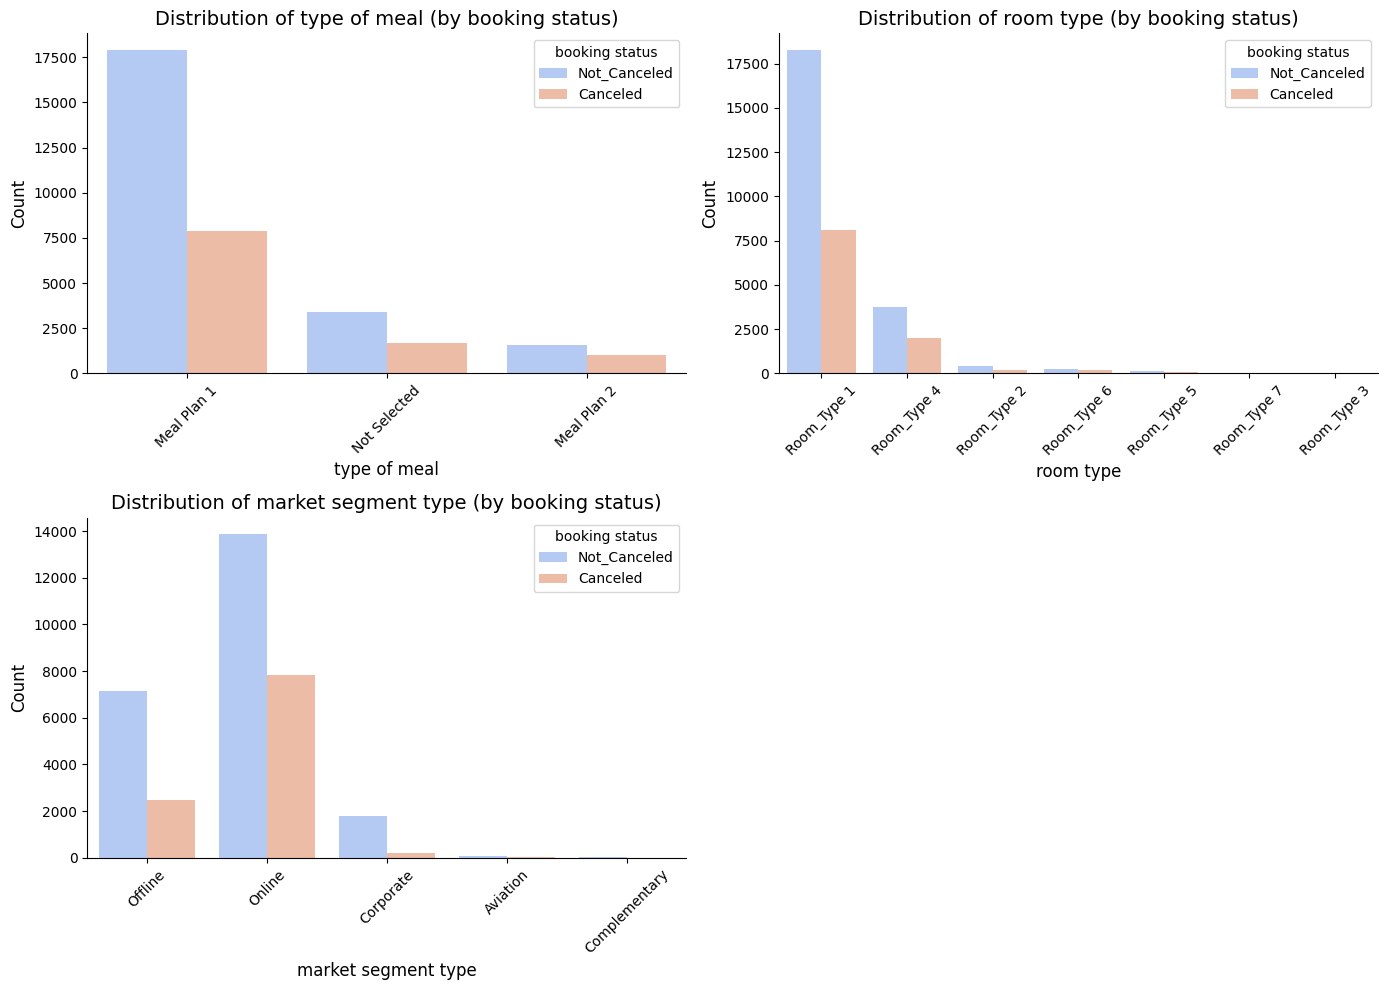

In [54]:
# Define the list of categorical columns
categorical_columns = ['type of meal', 'room type', 'market segment type']

# Define the number of columns and rows for the subplots
ncol = 2  # Number of columns in the grid
nrow = int(np.ceil(len(categorical_columns) / ncol))  # Number of rows

# Create a figure with subplots
fig, axes = plt.subplots(nrow, ncol, figsize=(14, 5 * nrow))  # Adjust figure size
fig.subplots_adjust(top=0.92)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through categorical columns and create count plots
for i, col in enumerate(categorical_columns):
    sns.countplot(data=new_df, x=col, hue="booking status", palette="coolwarm", ax=axes[i])
    axes[i].set_title(f'Distribution of {col} (by booking status)', fontsize=14)
    axes[i].set_xlabel(f'{col}', fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability
    sns.despine(ax=axes[i])

# Turn off any extra subplots if they exist
for j in range(len(categorical_columns), nrow * ncol):
    fig.delaxes(axes[j])

# Adjust layout to make sure everything fits nicely
plt.tight_layout()

# Display the plot
plt.show()



Type of Meal:

Meal Plan 1 remains the most popular option across both canceled and non-canceled bookings.
Cancellations are slightly more common for Meal Plan 1, though the other meal plans have a relatively smaller sample size and show fewer cancellations.
The other meal plans have much fewer bookings overall, showing a more balanced ratio between cancellations and non-cancellations.
Room Type:

Room Type 1 is the most popular room type, but it also has the highest number of cancellations compared to all other room types.
Room Type 4 is the second most popular room type, with fewer cancellations than Room Type 1.
Other room types (such as Room Type 2, 6, etc.) have fewer bookings overall, with a moderate distribution of cancellations.
Market Segment Type:

Online bookings dominate the market segment, making up the vast majority of reservations. They also exhibit a higher proportion of cancellations compared to non-canceled bookings.
Offline bookings come in second, with fewer cancellations but still a noticeable volume.
Corporate bookings have a much lower number of cancellations, indicating that this market segment tends to have more stable bookings with fewer cancellations.

Summary:
These insights highlight that although Room Type 1 and online bookings are popular, they also come with a higher cancellation risk. A strategic focus on reducing cancellations in these areas could improve overall booking retention.








In [29]:
#changing  type of meal, room type, market segment type, booking status to numerical columns using label encoder
label_encoder = LabelEncoder()
new_df['type of meal'] = label_encoder.fit_transform(new_df['type of meal'])
new_df['room type'] = label_encoder.fit_transform(new_df['room type'])
new_df['market segment type'] = label_encoder.fit_transform(new_df['market segment type'])
new_df['booking status'] = label_encoder.fit_transform(new_df['booking status'])
new_df.head(5)

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status,total nights
0,1,1,2,5,0,0,0,224,3,0,0,0,88.00,0,2015-10-02,1,7
1,1,0,1,3,2,0,0,5,4,0,0,0,106.68,1,2018-11-06,1,4
2,2,1,1,3,0,0,0,1,4,0,0,0,50.00,0,2018-02-28,0,4
3,1,0,0,2,0,0,0,211,4,0,0,0,100.00,1,2017-05-20,0,2
4,1,0,1,2,2,0,0,48,4,0,0,0,77.00,0,2018-04-11,0,3


In [19]:
not_canceled = new_df.loc[ new_df["booking status"] == 1]
canceled= new_df.loc[ new_df["booking status"] == 0]

# calculate the count of each category
not_canceled_count = len(not_canceled)
canceled_count = len(canceled)

# create a dataframe with the counts
counts = pd.DataFrame({'booking status': ['Not Canceled', 'Canceled'],
                       'Count': [not_canceled_count, canceled_count]})

# plot the results
fig = px.pie(counts, names='booking status', values='Count', title=f'Proportion of Canceled and Not Canceled Bookings (Canceled: {canceled_count}, Not Canceled: {not_canceled_count})')
fig.show()


almost 32% of customers cancel their bookings also the 2 classes are imbalanced so we should handle that

# feature engineering

In [20]:
# Step 1: Combine 'number of weekend nights' and 'number of week nights'
new_df['total nights'] = new_df['number of weekend nights'] + new_df['number of week nights']


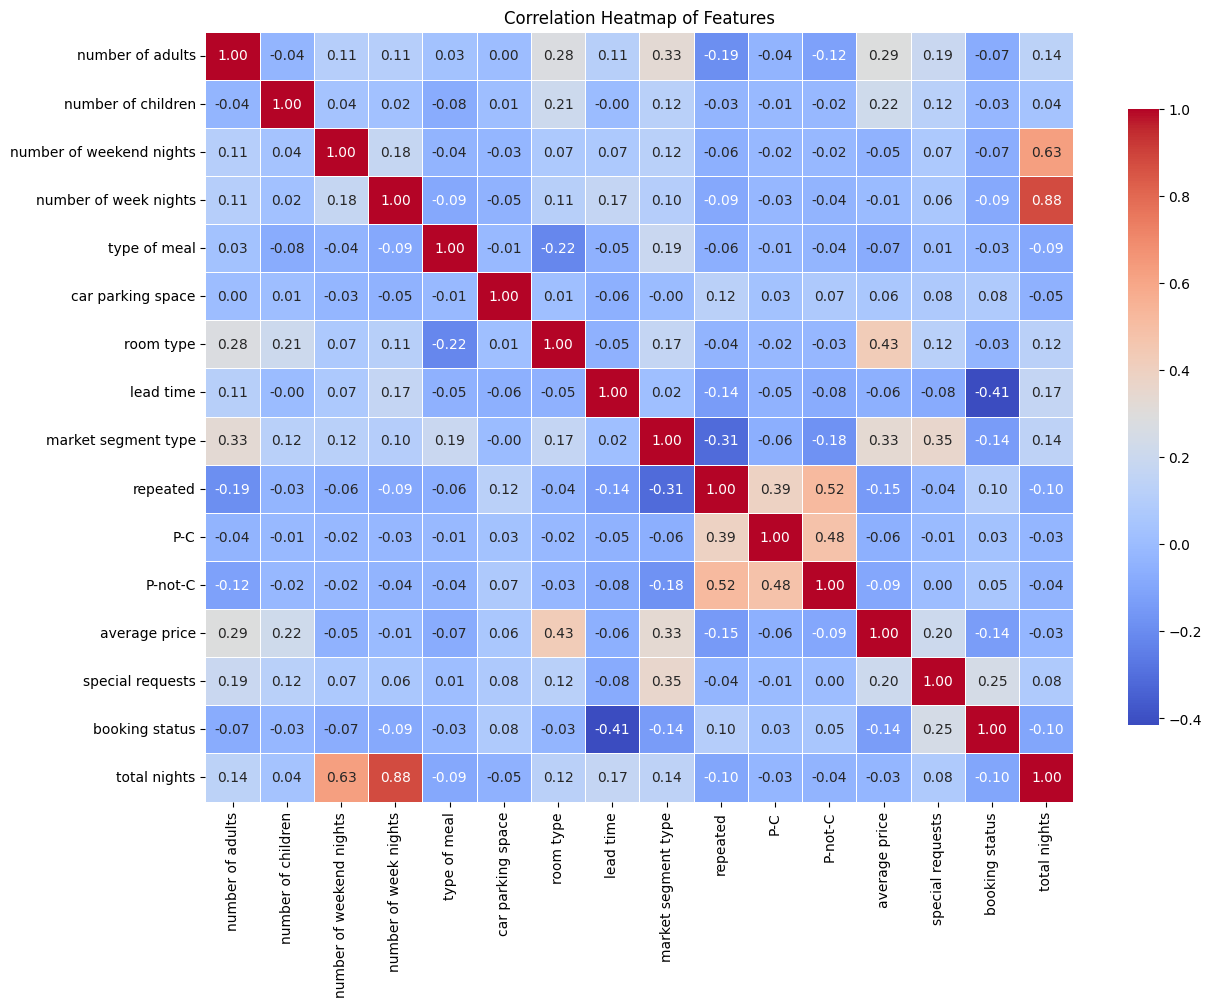

In [21]:
# Ensure all columns are numeric before calculating the correlation matrix
# Drop non-numeric columns if any remain
numeric_data = new_df.select_dtypes(include=[float, int])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the heatmap with annotations
plt.figure(figsize=(14, 10))
heatmap = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, cbar_kws={'shrink': .8})

plt.title("Correlation Heatmap of Features")
plt.show()

# Balancing the class column using smote technqiue

In [22]:
# Separate features (X) and target variable (y)
X = new_df.drop(columns=['booking status'])  # Features
y = new_df['booking status']  # Target variable

# Identify non-numeric columns
non_numeric_columns = X.select_dtypes(exclude=['number']).columns

# Drop non-numeric columns
X_numeric = X.drop(columns=non_numeric_columns)



In [23]:
from imblearn.combine import SMOTETomek

# Initialize SMOTETomek
smote_tomek = SMOTETomek(random_state=42)

# Apply SMOTETomek to generate synthetic samples and remove noisy ones
X_resampled, y_resampled = smote_tomek.fit_resample(X_numeric, y)

# Convert the resampled data back to a DataFrame
resampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X_numeric.columns), pd.DataFrame(y_resampled, columns=['booking status'])], axis=1)

# Check the class distribution after SMOTETomek
print("Class distribution after SMOTETomek:")
print(resampled_df['booking status'].value_counts())


Class distribution after SMOTETomek:
booking status
1    22423
0    22423
Name: count, dtype: int64


In [25]:

# Define features (X) and target (y) after SMOTE
X_resampled = resampled_df.drop(columns=['booking status'])  # Features
y_resampled = resampled_df['booking status']  # Target variable

# Feature Selection (use SelectKBest to keep top features)
# Here we're using ANOVA F-test to select the top 10 features (adjust as needed)
selector = SelectKBest(f_classif, k=10)
X_resampled_selected = selector.fit_transform(X_resampled, y_resampled)

# Display selected features
selected_features = X_resampled.columns[selector.get_support()]
print("Selected features:", selected_features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled_selected, y_resampled, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Feature importance analysis
feature_importances = pd.Series(model.feature_importances_, index=selected_features)
feature_importances.sort_values(ascending=False, inplace=True)
print("Feature importance ranking:\n", feature_importances)


Selected features: Index(['number of week nights', 'car parking space', 'lead time',
       'market segment type', 'repeated', 'P-C', 'P-not-C', 'average price',
       'special requests', 'total nights'],
      dtype='object')
Feature importance ranking:
 lead time                0.398138
average price            0.266906
special requests         0.149130
market segment type      0.073894
total nights             0.049890
number of week nights    0.044951
car parking space        0.009364
repeated                 0.005411
P-not-C                  0.001826
P-C                      0.000490
dtype: float64


In [26]:


# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Dictionary to store results
results = {}

# Iterate over models, train them, and evaluate their performance
for name, model in models.items():
    model.fit(X_train_scaled, y_train)  # Train the model
    y_pred = model.predict(X_test_scaled)  # Make predictions

    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store results
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

# Display results for all models
for model_name, metrics in results.items():
    print(f"{model_name}:\n Accuracy: {metrics['Accuracy']}, Precision: {metrics['Precision']}, Recall: {metrics['Recall']}, F1 Score: {metrics['F1 Score']}\n")


Logistic Regression:
 Accuracy: 0.7839464882943143, Precision: 0.7956769055745165, Recall: 0.7707736389684814, F1 Score: 0.7830273175100761

K-Nearest Neighbors:
 Accuracy: 0.8615384615384616, Precision: 0.8731596828992072, Recall: 0.8496804055543311, F1 Score: 0.8612600536193029

Support Vector Machine:
 Accuracy: 0.8124860646599777, Precision: 0.8300578034682081, Recall: 0.7912717654837998, F1 Score: 0.8102008575942226

Decision Tree:
 Accuracy: 0.8784838350055741, Precision: 0.8975778546712803, Recall: 0.857615164205422, F1 Score: 0.877141568981064

Random Forest:
 Accuracy: 0.9023411371237459, Precision: 0.908684974324626, Recall: 0.897068547498347, F1 Score: 0.9028393966282166



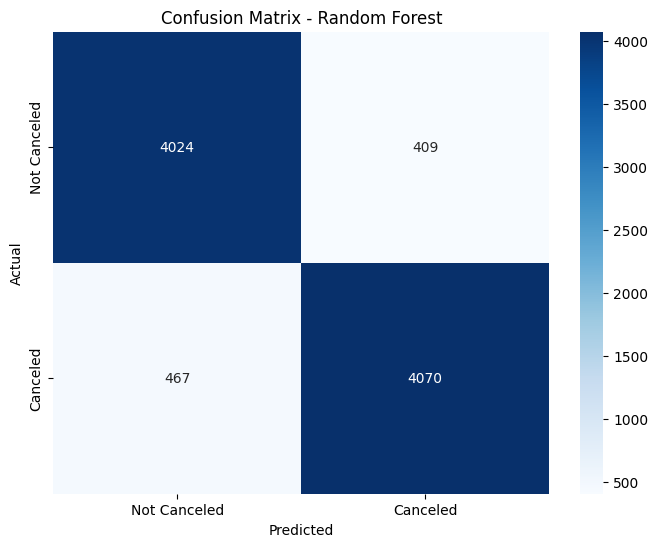

In [64]:


# Assuming you have already trained the RandomForest model
rf_model = models["Random Forest"]  # Retrieve the trained Random Forest model

# Make predictions with the Random Forest model
y_pred_rf = rf_model.predict(X_test_scaled)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Canceled', 'Canceled'], yticklabels=['Not Canceled', 'Canceled'])
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


Let’s calculate the performance metrics using these values.

1. Accuracy:
Accuracy
=
𝑇
𝑃
+
𝑇
𝑁
𝑇
𝑃
+
𝑇
𝑁
+
𝐹
𝑃
+
𝐹
𝑁
=
4024
+
4070
4024
+
4070
+
409
+
467
Accuracy=
TP+TN+FP+FN
TP+TN
​
 =
4024+4070+409+467
4024+4070
​


Accuracy
=
8094
8970
≈
0.902
Accuracy=
8970
8094
​
 ≈0.902
Accuracy ≈ 90.2%
This means the model predicts correctly in about 90.2% of cases.

2. Precision (Positive Predictive Value):
Precision
=
𝑇
𝑃
𝑇
𝑃
+
𝐹
𝑃
=
4024
4024
+
409
Precision=
TP+FP
TP
​
 =
4024+409
4024
​


Precision
=
4024
4433
≈
0.908
Precision=
4433
4024
​
 ≈0.908
Precision ≈ 90.8%
This means when the model predicts 'Canceled,' it's correct 90.8% of the time.

3. Recall (Sensitivity or True Positive Rate):
Recall
=
𝑇
𝑃
𝑇
𝑃
+
𝐹
𝑁
=
4024
4024
+
467
Recall=
TP+FN
TP
​
 =
4024+467
4024
​


Recall
=
4024
4491
≈
0.896
Recall=
4491
4024
​
 ≈0.896
Recall ≈ 89.6%
This indicates that the model correctly identifies 89.6% of all actual 'Canceled' bookings.

4. F1 Score (Balance of Precision and Recall):
F1 Score
=
2
×
Precision
×
Recall
Precision
+
Recall
F1 Score=2×
Precision+Recall
Precision×Recall
​


F1 Score
=
2
×
0.908
×
0.896
0.908
+
0.896
=
2
×
0.813
1.804
≈
0.901
F1 Score=2×
0.908+0.896
0.908×0.896
​
 =2×
1.804
0.813
​
 ≈0.901
F1 Score ≈ 90.1%
The F1 Score balances precision and recall, showing that the model performs well in both reducing false positives and false negatives.

Evaluation Summary:
Accuracy (90.2%): The model predicts correctly in 90.2% of the cases.
Precision (90.8%): High precision, meaning when the model predicts cancellations, it is right 90.8% of the time.
Recall (89.6%): Good recall, meaning the model captures 89.6% of actual cancellations.
F1 Score (90.1%): A good balance between precision and recall, which is essential when you care about both types of errors (false positives and false negatives).
Considerations:
False Positives (FP = 409): There are still cases where the model predicts cancellations but they were not actually canceled.
False Negatives (FN = 467): The model misses some actual cancellations, predicting them as 'Not Canceled.'
Overall, the model is performing well, but depending on the business needs (e.g., minimizing false negatives or false positives), further tuning could be beneficial.

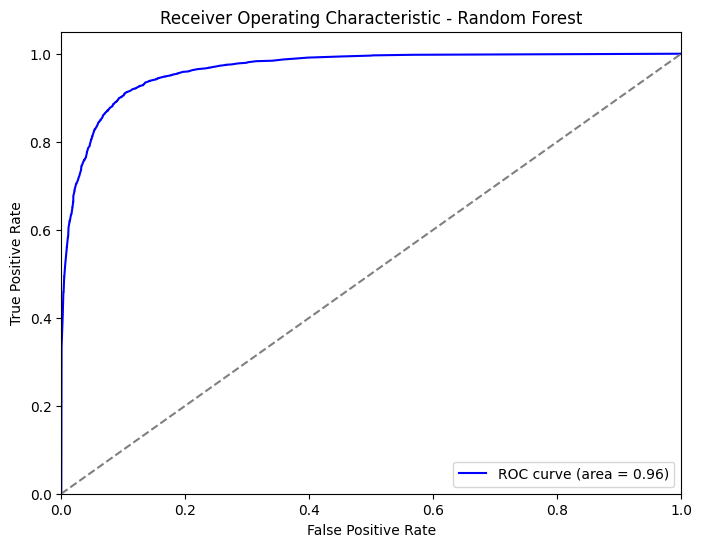

In [27]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic - Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


an AUC of 0.96 (from the ROC curve) indicates excellent model performance. Here's what it means in simple terms:

Class Separation: The model has a 96% chance of distinguishing between positive and negative classes (e.g., "Canceled" vs. "Not Canceled"). In other words, if you randomly select one canceled booking and one non-canceled booking, there's a 96% chance that the model will correctly rank the canceled one higher in terms of its likelihood of being canceled.

Model Performance:

AUC = 0.5: The model is no better than random guessing.
AUC = 1.0: The model is perfect—it can perfectly distinguish between the classes.
AUC close to 1 (e.g., 0.96): Your model is very close to perfect, meaning it does an excellent job of predicting the correct class, even across different thresholds.